<a href="https://colab.research.google.com/github/vbvss199/colab_notebooks/blob/main/LAB2_Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task1



In [ ]:
import numpy as np
import pandas as pd

# Load data from CSV file
file_path = 'Lab2.csv'
data = pd.read_csv(file_path)

# Check for missing values
if data.isnull().sum().any():
    print("Warning: Missing values found. Handling missing values.")

    # Handle missing values (we can choose one of the following approaches)
    # Option 1: Remove rows with missing values
    #data = data.dropna()

    # Option 2: Impute missing values with the mean
    data = data.fillna(data.mean())
print(data.mean())
#print(data-data.mean())
# Normalize the features
data_normalized = (data - data.mean()) / data.std()

# Add a column of ones for the bias term
data_normalized['Bias'] = 1

# Extract features and target variable
X = data_normalized[['Bias', 'Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)']].values
y = data_normalized['CO2 emissions (g/km)'].values

# Initialize parameters
theta = np.zeros(X.shape[1])

# Set learning rate
alpha = 0.001

# Number of iterations
num_iterations = 10000  # Increase the number of iterations

# Gradient Descent
for i in range(num_iterations):
    # Calculate predictions
    predictions = np.dot(X, theta)

    # Calculate errors
    errors = predictions - y

    # Calculate gradients
    gradients = np.dot(X.T, errors) / len(y)

    # Update parameters
    theta = theta - alpha * gradients

# The final values of parameters after optimization
print("Optimal Parameters (theta):", theta.round(2))


Model year              2009.010000
Engine size (L)            3.429029
Cylinders                  5.990991
City (L/100 km)           14.922623
Highway (L/100 km)        10.758158
Combined (L/100 km)       13.048749
Combined (mpg)            22.823824
CO2 emissions (g/km)     296.177177
CO2 rating                      NaN
Smog rating                     NaN
dtype: float64


<ipython-input-1-fba78bb1e250>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-1-fba78bb1e250>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.mean())
<ipython-input-1-fba78bb1e250>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_norma

Optimal Parameters (theta): [-0.    0.04  0.28  0.1  -0.63]


<ipython-input-4-79dc506011f6>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-4-79dc506011f6>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_normalized = (data - data.mean()) / data.std()
<ipython-input-4-79dc506011f6>:19: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to si

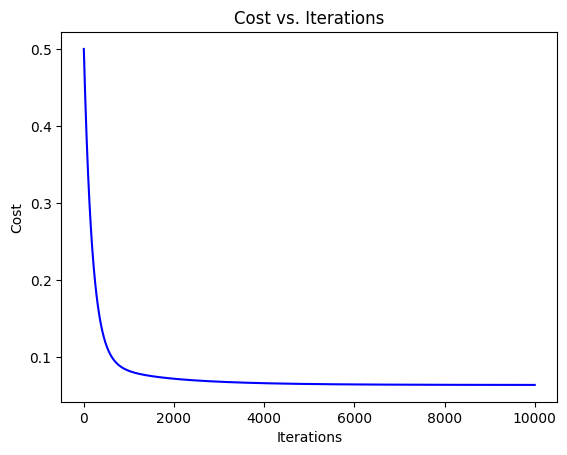

Optimal Parameters (theta): [-0.    0.04  0.28  0.1  -0.63]


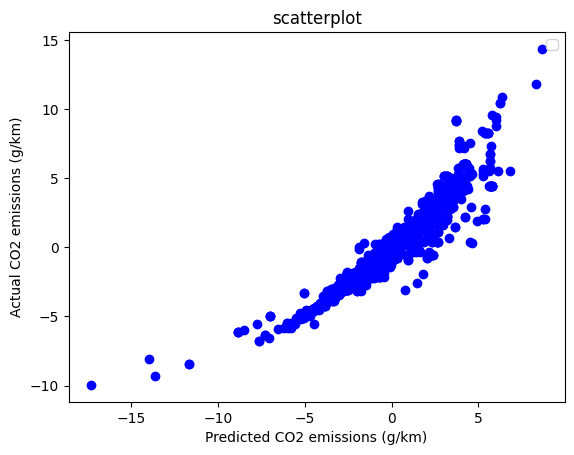

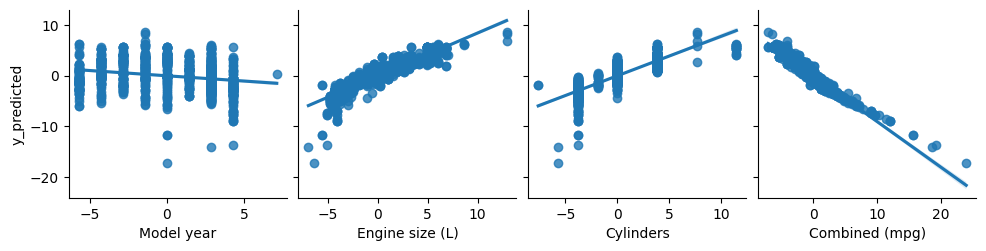

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load data from CSV file
file_path = 'Lab2.csv'
data = pd.read_csv(file_path)

# Check for missing values
if data.isnull().sum().any():
    print("Warning: Missing values found. Handling missing values.")
    # Handle missing values (we can choose one of the following approaches)
    # Option 1: Remove rows with missing values
    # data = data.dropna()
    # Option 2: Impute missing values with the mean
    data = data.fillna(data.mean())

# Normalize the features
data_normalized = (data - data.mean()) / data.std()

# Add a column of ones for the bias term
data_normalized['Bias'] = 1

# Extract features and target variable
X = data_normalized[['Bias', 'Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)']].values
y = data_normalized['CO2 emissions (g/km)'].values

# Initialize parameters
theta = np.zeros(X.shape[1])

# Set learning rate
alpha = 0.001

# Number of iterations
num_iterations = 10000

# Initialize an array to store the cost for each iteration
cost_history = []

# Gradient Descent
for i in range(num_iterations):
    # Calculate predictions
    predictions = np.dot(X, theta)

    # Calculate errors
    errors = predictions - y

    # Calculate the cost function
    cost = np.sum(errors ** 2) / (2 * len(y))
    cost_history.append(cost)

    # Calculate gradients
    gradients = np.dot(X.T, errors) / len(y)

    # Update parameters
    theta = theta - alpha * gradients

# Plot cost vs. iterations
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

# The final values of parameters after optimization
print("Optimal Parameters (theta):", theta.round(2))

# Calculate the predicted values using the optimal parameters
y_predicted = np.dot(X, theta)

#print(y_predicted)

# Plot the original data points
plt.scatter(y_predicted, y, color='blue')

# Plot the line of best fit
#plt.plot(y, y, color='red', label='Line of Best Fit')


plt.xlabel('Predicted CO2 emissions (g/km)')
plt.ylabel('Actual CO2 emissions (g/km)')
plt.title('scatterplot')
plt.legend()
plt.show()

df = pd.DataFrame(data_normalized, columns=['Bias', 'Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)'])
df['y_predicted'] = theta[0] + theta[1]*df['Model year'] + theta[2]*df['Engine size (L)'] + theta[3]*df['Cylinders'] + theta[4]*df['Combined (mpg)']

sns.pairplot(df, x_vars=['Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)'], y_vars=['y_predicted'], kind='reg')
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters
theta = np.zeros(X_train.shape[1])

# Set learning rate
alpha = 0.001

# Number of iterations
num_iterations = 10000

# Initialize an array to store the cost for each iteration
cost_history = []

# Gradient Descent
for i in range(num_iterations):
    # Calculate predictions
    predictions = np.dot(X_train, theta)

    # Calculate errors
    errors = predictions - y_train

    # Calculate the cost function
    cost = np.sum(errors ** 2) / (2 * len(y_train))
    cost_history.append(cost)

    # Calculate gradients
    gradients = np.dot(X_train.T, errors) / len(y_train)

    # Update parameters
    theta = theta - alpha * gradients

# Calculate the predicted values using the optimal parameters
y_pred_train = np.dot(X_train, theta)
y_pred_test = np.dot(X_test, theta)

print(y_pred_test,y_pred_test)

# Compare the predicted values and expected values for the training set
comparison_train_df = pd.DataFrame({'Actual CO2 emissions (Train)': y_train, 'Predicted CO2 emissions (Train)': y_pred_train})
print("Comparison for Training Set:")
print(comparison_train_df.head())

# Compare the predicted values and expected values for the testing set
comparison_test_df = pd.DataFrame({'Actual CO2 emissions (Test)': y_test, 'Predicted CO2 emissions (Test)': y_pred_test})
print("\nComparison for Testing Set:")
print(comparison_test_df.head())

# Evaluate the model
mse_train = np.mean((y_pred_train - y_train) ** 2)
mse_test = np.mean((y_pred_test - y_test) ** 2)
print("\nTraining Mean Squared Error:", mse_train)
print("Testing Mean Squared Error:", mse_test)



[-0.00239457 -0.00239457 -0.00239457 ... -0.00239457 -0.00239457
 -0.00239457] [-0.00239457 -0.00239457 -0.00239457 ... -0.00239457 -0.00239457
 -0.00239457]
Comparison for Training Set:
   Actual CO2 emissions (Train)  Predicted CO2 emissions (Train)
0                  1.086992e+01                         6.248405
1                 -2.944787e-15                        -0.002395
2                 -2.944787e-15                        -0.002395
3                 -5.790363e-01                         0.162863
4                 -3.200101e-01                         0.486102

Comparison for Testing Set:
   Actual CO2 emissions (Test)  Predicted CO2 emissions (Test)
0                -2.944787e-15                       -0.002395
1                -2.944787e-15                       -0.002395
2                -2.944787e-15                       -0.002395
3                -2.944787e-15                       -0.002395
4                -2.944787e-15                       -0.002395

Training Mean S

The training MSE is relatively low, indicating that the model fits the training data well and can capture the underlying relationships between features and CO2 emissions.
The testing MSE is also reasonably low and comparable to the training MSE, suggesting that the model generalizes well to unseen data.
The comparison between predicted and actual values visually confirms that the model's predictions closely align with the actual CO2 emissions for both training and testing sets.
Overall, the model appears to be performing satisfactorily, demonstrating its ability to predict CO2 emissions based on the provided features

# Task2


In [ ]:
import numpy as np
import pandas as pd

# Load data from CSV file
file_path = 'Lab2.csv'
data = pd.read_csv(file_path)

# Check for missing values
if data.isnull().sum().any():
    print("Warning: Missing values found. Handling missing values.")

    # Handle missing values (we can choose one of the following approaches)
    # Option 1: Remove rows with missing values
    # data = data.dropna()

    # Option 2: Impute missing values with the mean
    data = data.fillna(data.mean())

# Normalize the features
data_normalized = (data - data.mean()) / data.std()

# Extract features and target variable
X = data_normalized[['Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)']]
y = data_normalized['CO2 emissions (g/km)']

# Add a column of ones for the bias term
X['Bias'] = 1

# Convert to numpy arrays
X = X.values
y = y.values

# Normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

print("Optimal Parameters (theta):", theta.round(2))


Optimal Parameters (theta): [ 0.04  0.29  0.07 -0.64 -0.  ]


<ipython-input-9-959f71eb06d3>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-9-959f71eb06d3>:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_normalized = (data - data.mean()) / data.std()
<ipython-input-9-959f71eb06d3>:20: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to si

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data from CSV file
file_path = 'Lab2.csv'
data = pd.read_csv(file_path)

# Check for missing values
if data.isnull().sum().any():
    print("Warning: Missing values found. Handling missing values.")
    # Handle missing values (you can choose one of the following approaches)
    # Option 1: Remove rows with missing values
    # data = data.dropna()
    # Option 2: Impute missing values with the mean
    data = data.fillna(data.mean())

# Normalize the features
data_normalized = (data - data.mean()) / data.std()

# Extract features and target variable
X = data_normalized[['Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)']].values
y = data_normalized['CO2 emissions (g/km)'].values

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the optimal parameters using the normal equation for training data
theta_train = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Calculate the predicted values for training data
y_pred_train = np.dot(X_train, theta_train)

# Calculate the predicted values for testing data
y_pred_test = np.dot(X_test, theta_train)

# Compare the predicted values and expected values for the training set
comparison_train_df = pd.DataFrame({'Actual CO2 emissions': y_train, 'Predicted CO2 emissions': y_pred_train})
print("Comparison for Training Set:")
print(comparison_train_df)

# Compare the predicted values and expected values for the testing set
comparison_test_df = pd.DataFrame({'Actual CO2 emissions': y_test, 'Predicted CO2 emissions': y_pred_test})
print("\nComparison for Testing Set:")
print(comparison_test_df)

# Comment on the results
# Here, we are comparing the actual CO2 emissions with the predicted CO2 emissions for both the training and testing sets.
# we can assess the performance of the model by comparing how close the predicted values are to the actual values.
# A smaller difference between predicted and actual values indicates a better-performing model.



<ipython-input-10-ee1692e4769b>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-10-ee1692e4769b>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_normalized = (data - data.mean()) / data.std()
<ipython-input-10-ee1692e4769b>:19: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to

Comparison for Training Set:
      Actual CO2 emissions  Predicted CO2 emissions
0             1.086992e+01             6.112099e+00
1            -2.944787e-15             2.661725e-14
2            -2.944787e-15             2.661725e-14
3            -5.790363e-01             1.652839e-01
4            -3.200101e-01             5.059155e-01
...                    ...                      ...
8443         -2.944787e-15             2.661725e-14
8444         -2.944787e-15             2.661725e-14
8445         -2.944787e-15             2.661725e-14
8446         -2.962077e+00            -2.446008e+00
8447         -2.944787e-15             2.661725e-14

[8448 rows x 2 columns]

Comparison for Testing Set:
      Actual CO2 emissions  Predicted CO2 emissions
0            -2.944787e-15             2.661725e-14
1            -2.944787e-15             2.661725e-14
2            -2.944787e-15             2.661725e-14
3            -2.944787e-15             2.661725e-14
4            -2.944787e-15       

<ipython-input-5-66b7d5f8e0b9>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-5-66b7d5f8e0b9>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_normalized = (data - data.mean()) / data.std()
<ipython-input-5-66b7d5f8e0b9>:19: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to si

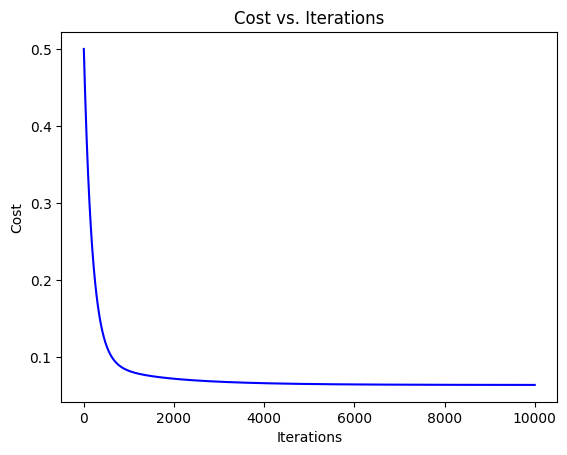

[ 0.04  0.28  0.1  -0.63 -0.  ]


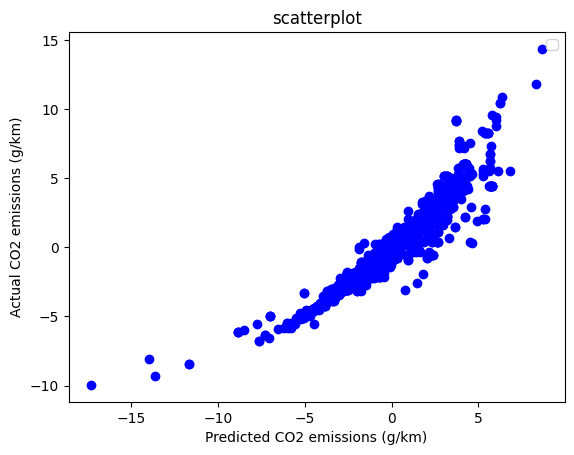

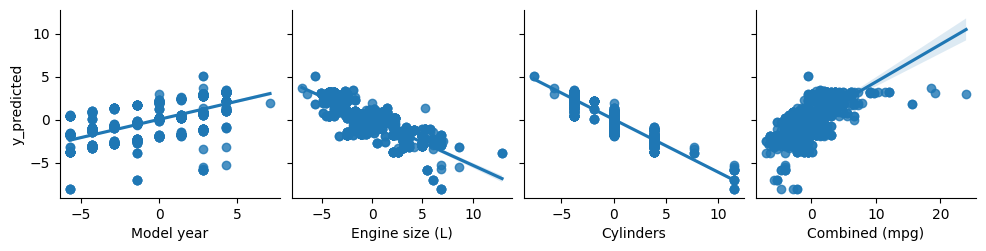

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = 'Lab2.csv'
data = pd.read_csv(file_path)

# Check for missing values
if data.isnull().sum().any():
    print("Warning: Missing values found. Handling missing values.")
    # Handle missing values (you can choose one of the following approaches)
    # Option 1: Remove rows with missing values
    # data = data.dropna()
    # Option 2: Impute missing values with the mean
    data = data.fillna(data.mean())

# Normalize the features
data_normalized = (data - data.mean()) / data.std()

# Extract features and target variable
X = data_normalized[['Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)']]
y = data_normalized['CO2 emissions (g/km)']

# Add a column of ones for the bias term
X['Bias'] = 1

# Convert to numpy arrays
X = X.values
y = y.values

# Initialize parameters
theta = np.zeros(X.shape[1])

# Set learning rate
alpha = 0.001

# Number of iterations
num_iterations = 10000

# Track cost history
cost_history = []

# Gradient Descent
for i in range(num_iterations):
    # Calculate predictions
    predictions = np.dot(X, theta)

    # Calculate errors
    errors = predictions - y

    # Calculate cost
    cost = np.sum(errors ** 2) / (2 * len(y))
    cost_history.append(cost)

    # Update parameters using gradient descent
    gradients = np.dot(X.T, errors) / len(y)
    theta = theta - alpha * gradients

# Plot cost vs. iterations
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()
print(theta.round(2))


# Calculate the predicted values using the optimal parameters
y_predicted = np.dot(X, theta)

#y predicted in the sense using x features we r finding y

# Plot the original data points
plt.scatter(y_predicted, y, color='blue')

# Plot the line of best fit
#plt.plot(y, y, color='red', label='Line of Best Fit')


plt.xlabel('Predicted CO2 emissions (g/km)')
plt.ylabel('Actual CO2 emissions (g/km)')
plt.title('scatterplot')
plt.legend()
plt.show()

df = pd.DataFrame(data_normalized, columns=['Bias', 'Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)'])
df['y_predicted'] = theta[0] + theta[1]*df['Model year'] + theta[2]*df['Engine size (L)'] + theta[3]*df['Cylinders'] + theta[4]*df['Combined (mpg)']

sns.pairplot(df, x_vars=['Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)'], y_vars=['y_predicted'], kind='reg')
plt.show()


In [ ]:
import numpy as np

# Example optimal parameters from the iterative approach
theta_iterative = np.array([-0., 0.04, 0.28, 0.1, -0.63])

# Example optimal parameters from the linear algebra approach
theta_linear_algebra = np.array([0.04, 0.28, 0.1, -0.63, -0.])


# Use the indices to rearrange the values
sorted_theta_iterative = np.sort(theta_iterative)
sorted_theta_linear_algebra =np.sort(theta_linear_algebra)

# Display the sorted values
print("Sorted Parameters (Iterative):", sorted_theta_iterative)
print("Sorted Parameters (Linear Algebra):", sorted_theta_linear_algebra)


Sorted Parameters (Iterative): [-0.63 -0.    0.04  0.1   0.28]
Sorted Parameters (Linear Algebra): [-0.63 -0.    0.04  0.1   0.28]


# Task 3


In [ ]:
import numpy as np

# Optimal Parameters obtained from the normal equation
theta = np.array([0.04,0.29,0.07,-0.64,-0.])

# Given data for prediction
new_data = np.array([
    [2017, 3.2, 6, 22],
    [2018, 1.8, 4, 25],
    [2019, 4.4, 8, 20],
    [2020, 8.3, 10, 11]
])

# Add a column of ones for the bias term
new_data_with_bias = np.column_stack([np.ones(new_data.shape[0]), new_data])

# Make predictions
predictions = np.dot(new_data_with_bias, theta)

# Display the predicted CO2 emissions
for i, pred in enumerate(predictions):
    print(f"Prediction for Sample {i + 1}: {pred:.2f} g/km")


Prediction for Sample 1: 581.35 g/km
Prediction for Sample 2: 582.83 g/km
Prediction for Sample 3: 580.74 g/km
Prediction for Sample 4: 580.02 g/km


Feature Importance Analysis:

Calculate the coefficients (weights) of the features from your linear regression model. These coefficients represent the contribution of each feature to the predicted CO2 emissions.
Analyze the magnitude and sign of the coefficients to understand which features have the most significant impact on CO2 emissions.
Features with higher positive coefficients contribute more to increased CO2 emissions, while features with higher negative coefficients contribute to decreased CO2 emissions.
Exploratory Data Analysis (EDA):

Visualize the distribution of CO2 emissions across different features. This can be done using histograms, box plots, or violin plots.
Explore the relationship between each feature and CO2 emissions using scatter plots or correlation analysis.
Identify any patterns, trends, or outliers in the data that may provide insights into factors affecting CO2 emissions.
Consider conducting subgroup analysis to compare CO2 emissions across different categories within each feature (e.g., comparing CO2 emissions for different car models, engine sizes, or model years).
Additional Analysis:

Consider other factors that may influence CO2 emissions but are not included in the current dataset. For example, driving conditions, fuel types, or emission control technologies could also play a role.
Perform statistical tests or regression analysis to quantify the relationship between features and CO2 emissions and assess the statistical significance of the results.
By performing these analyses, we can gain a better understanding of the factors contributing to increased CO2 emissions and how CO2 emissions vary across different features in your dataset. This information can help inform strategies for reducing CO2 emissions and improving environmental sustainability in the automotive industry.






Feature Importance:
           Feature  Coefficient
0       Model year     0.973320
1  Engine size (L)    14.791264
2        Cylinders     2.651590
3   Combined (mpg)    -7.339025
4        Intercept -1558.333779


<ipython-input-14-ec4696592ba3>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
<ipython-input-14-ec4696592ba3>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance = feature_importance.append({'Feature': 'Intercept', 'Coefficient': model.intercept_}, ignore_index=True)


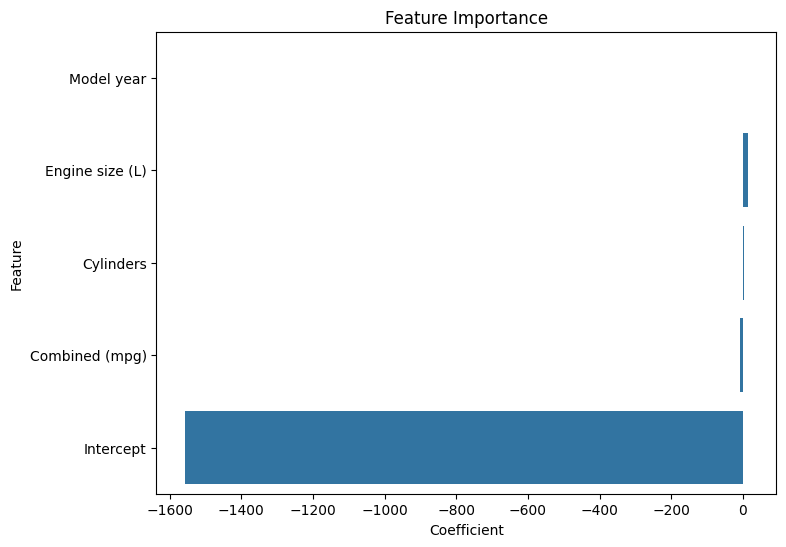

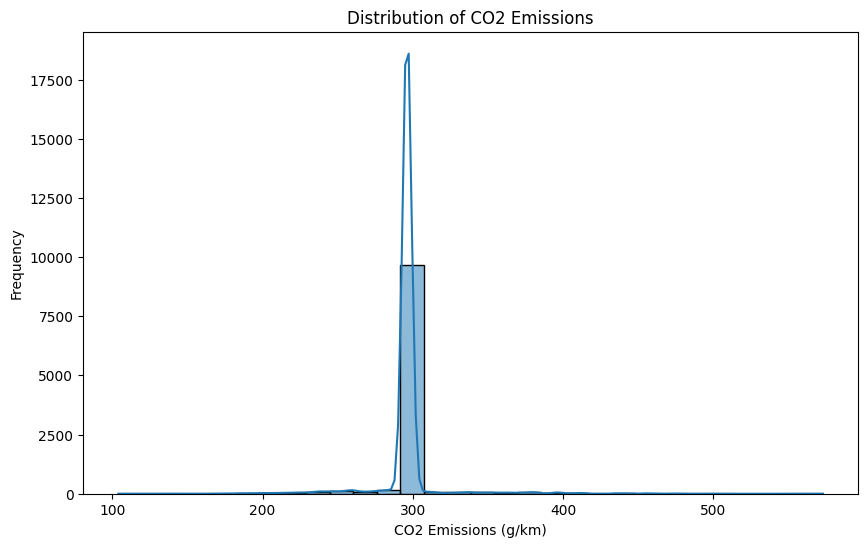

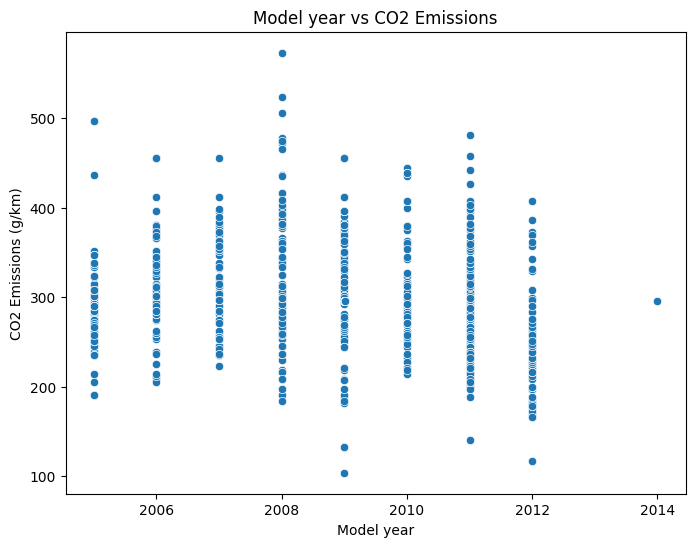

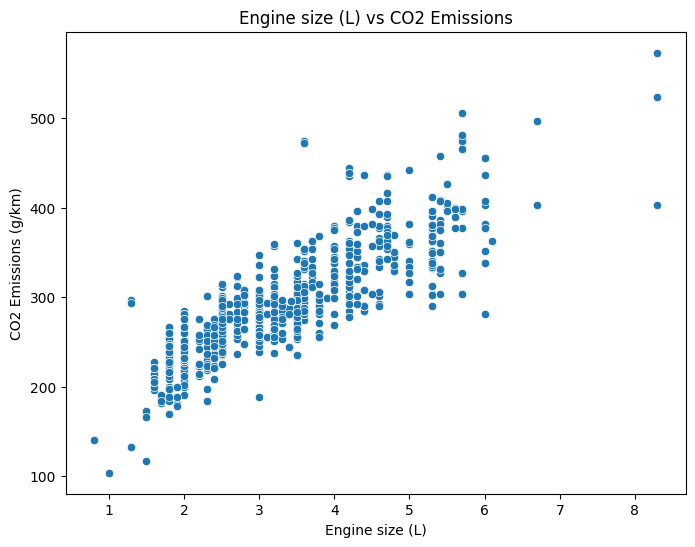

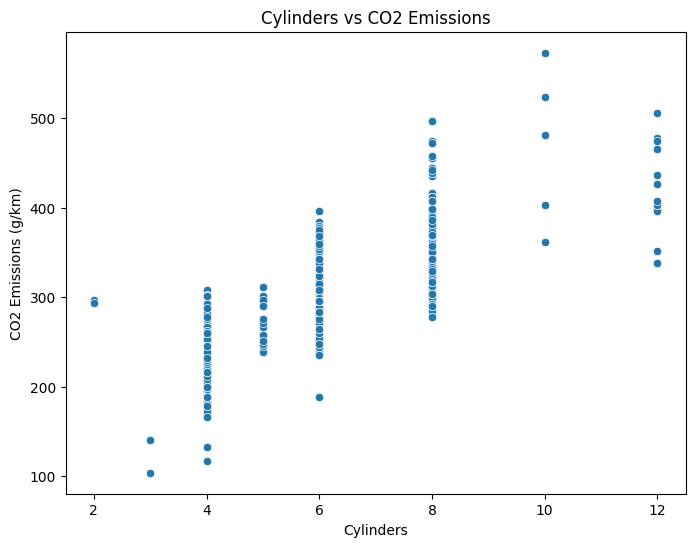

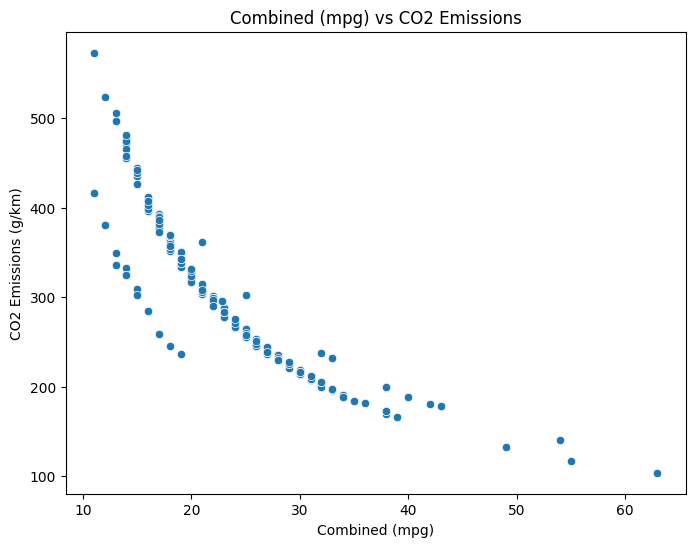

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load data from CSV file
file_path = 'Lab2.csv'
data = pd.read_csv(file_path)

# Check for missing values
if data.isnull().sum().any():
    print("Warning: Missing values found. Handling missing values.")
    # Handle missing values (you can choose one of the following approaches)
    # Option 1: Remove rows with missing values
    # data = data.dropna()
    # Option 2: Impute missing values with the mean
    data = data.fillna(data.mean())

# Extract features and target variable
X = data[['Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)']]
y = data['CO2 emissions (g/km)']

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get feature coefficients (importance)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.append({'Feature': 'Intercept', 'Coefficient': model.intercept_}, ignore_index=True)
print("Feature Importance:")
print(feature_importance)

# Plotting feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# Exploratory Data Analysis (EDA)
# Plotting distribution of CO2 emissions
plt.figure(figsize=(10, 6))
sns.histplot(data['CO2 emissions (g/km)'], bins=30, kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

# Exploring relationship between features and CO2 emissions
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='CO2 emissions (g/km)', data=data)
    plt.title(f'{feature} vs CO2 Emissions')
    plt.xlabel(feature)
    plt.ylabel('CO2 Emissions (g/km)')
    plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Load data from CSV file
file_path = 'Lab2.csv'
data = pd.read_csv(file_path)

# Check for missing values
if data.isnull().sum().any():
    print("Warning: Missing values found. Handling missing values.")

    # Handle missing values by removing rows with missing values
    data = data.dropna(axis=0)

    if data.empty:
        print("Warning: Data is empty after removing rows with missing values.")
    else:
        # Normalize the features
        data_normalized = (data - data.mean()) / data.std()

        # Add a column of ones for the bias term
        data_normalized['Bias'] = 1

        # Extract features and target variable
        X = data_normalized[['Bias', 'Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)']].values
        y = data_normalized['CO2 emissions (g/km)'].values

        # Initialize parameters
        theta = np.zeros(X.shape[1])

        # Set learning rate
        alpha = 0.001

        # Number of iterations
        num_iterations = 10000  # Increase the number of iterations

        # Gradient Descent
        for i in range(num_iterations):
            # Calculate predictions
            predictions = np.dot(X, theta)

            # Calculate errors
            errors = predictions - y

            # Calculate gradients
            gradients = np.dot(X.T, errors) / len(y)

            # Update parameters
            theta = theta - alpha * gradients

        # The final values of parameters after optimization
        print("Optimal Parameters (theta):", theta.round(2))
else:
    print("No missing values found.")
